# Brick Kiln v1.0

### Done
* Convert images
* Georeferenced
* Write Task Specifications

### TODO
* partition
* decide if we should include images from zenodo as well

### Questions to authors
* why is the zenodo trainin set smaller than the evaluation set on github?
* why are there 2 samples that have a truncated and inconsistent shape e.g. sample TALL_043_2019 shapes are: rgb = (3,400,392), chm = (1,40,1), hyperspectral=(426,40,39)
* is spatial resolution 0.1m, 1m, 1m for rgb, chm, hs?

In [6]:
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..") # TODO fix this hack (can't set the project directory in notebook for vscode)

from ccb.dataset import statistics
from dataset_converters import neon_tree
import ipyplot


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Plotting statistics: 100%|██████████| 9/9 [00:01<00:00,  8.04it/s]
../ccb/dataset/statistics.py:214: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  max_shape = np.array(shapes).max(axis=0)


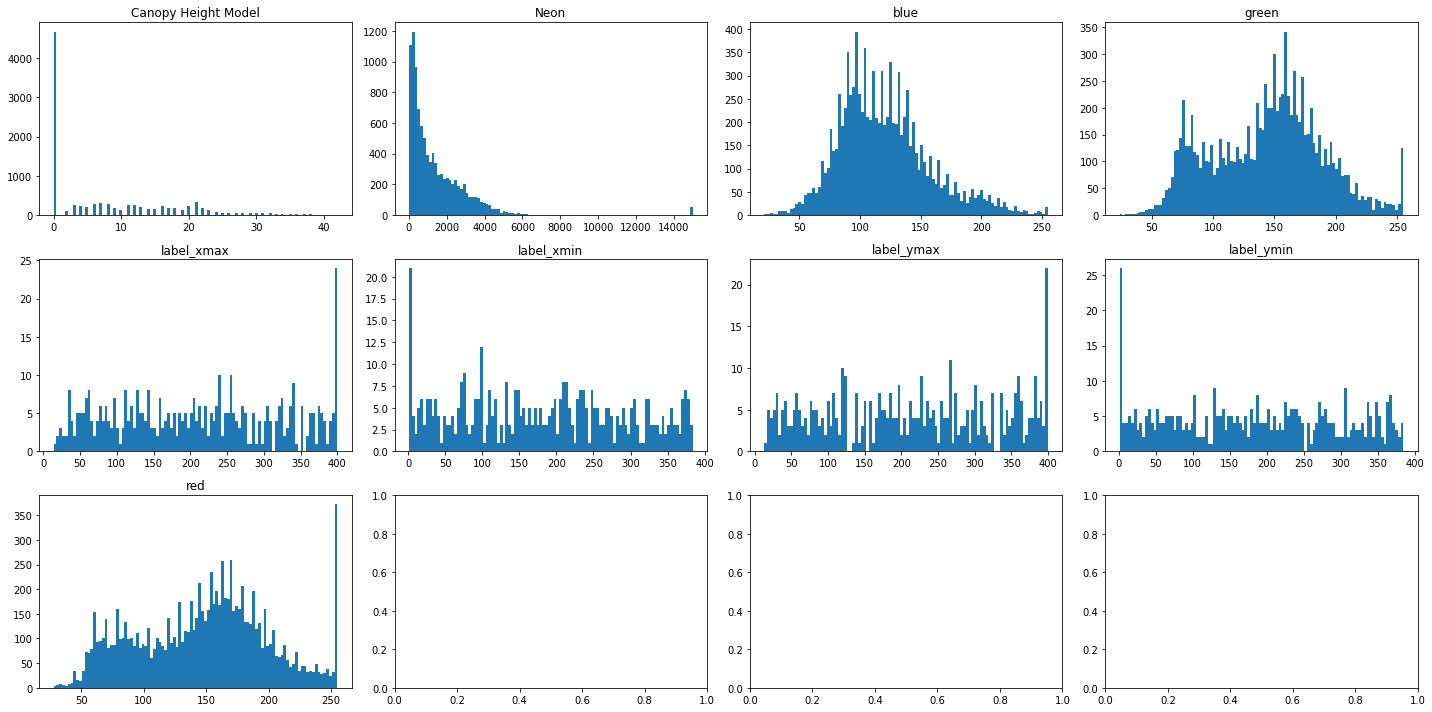

In [24]:
dataset, samples, band_values, band_stats = statistics.load_and_veryify_samples(neon_tree.dataset_dir, n_samples=10)
statistics.check_integrity(samples, dataset.task_specs)

In [34]:
images, _ = statistics.extract_images(samples)
ipyplot.plot_images(images=images, img_width=128, max_images=50)

In [27]:
images, labels = statistics.extract_bands(samples, (('red', 'green', 'blue'), ('CHM',)))
ipyplot.plot_class_tabs(images=images, labels=labels, img_width=64, max_imgs_per_tab=48)



TypeError: Cannot handle this data type: (1, 1, 426), |u1

In [11]:
statistics.leaflet_map(samples)

100%|██████████| 100/100 [00:00<00:00, 147.93it/s]


Map(center=[24.97064961572716, 92.51479616561716], controls=(ZoomControl(options=['position', 'zoom_in_text', …